<font face="XB Zar" size=5><div dir=rtl align=center>
<font face="IranNastaliq" size=5>
به نام خدا
</font>
<br>
<font size=3>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
</font>
<br>
<font color=blue size=5>
مقدمه‌ای بر یادگیری ماشین
</font>
<br>
<hr/>
<font color=red size=6>
فصل شش
<br>
CNN Architecture 
</font>
<br>
نویسندگان:‌ آرین امانی
<hr>

<br>
  <div align="right">
  <font color="red" size=5>فهرست مطالب</font>
	<ul>
    <li>
		  <a href="#Kernels">
        آشنایی با لایه کانولوشنی
        <ul>
          <li>
            <a href="#recap">
              یاد آوری شبکه کاملا متصل(Fully Connected)
            </a>
          </li>
          <li>
            <a href="#cnn">
              شبکه پیچشی(Convolutional)
            </a>
          </li>
        </ul>
    </a>
		</li>
</div></font>

In [1]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

  <div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
      آشنایی با لایه کانولوشنی
      </font>
      <hr/>
      یاد آوری شبکه پیچشی کاملا متصل - Fully Connected:
  </font>
  </div>

![FC](https://drive.google.com/uc?export=view&id=15YcnB-3E2D-pGlssP3JPWrwd1_92xfcW)

  <div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
      آشنایی با لایه کانولوشنی
      </font>
      <hr/>
      همانطور که در اسلایدهای کلاس هم دیدید، تفاوت زیادی بین یادگیری یک مدل کاملا متصل و یک مدل پیچشی وجود دارد.
      <br>
      در مدل‌های Convolutional، ما با مدل‌هایی با پارامترهای بسیار کمتر، نتایجی بسیار بهتر روی دادگان تصویری می‌گیریم.
      <br><br>
      آزمایش انجام شده در اسلایدهای کلاس را در این قسمت می‌توانید خودتان انجام داده و نتایج را مقایسه کنید.
      </hr>
      
  </font>
  </div>


In [15]:
# Download the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Preprocessing the data
trainY = to_categorical(y_train)
testY = to_categorical(y_test)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

# Inputs for the Dense Model
dense_train = x_train.reshape(-1, 32*32*3)
dense_test = x_test.reshape(-1, 32*32*3)

  <div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
      <hr/>
      مدلی کاملا متصل ساخته و آن را روی دیتای CIFAR10 آموزش می‌دهیم.
      </hr>
      
  </font>
  </div>


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


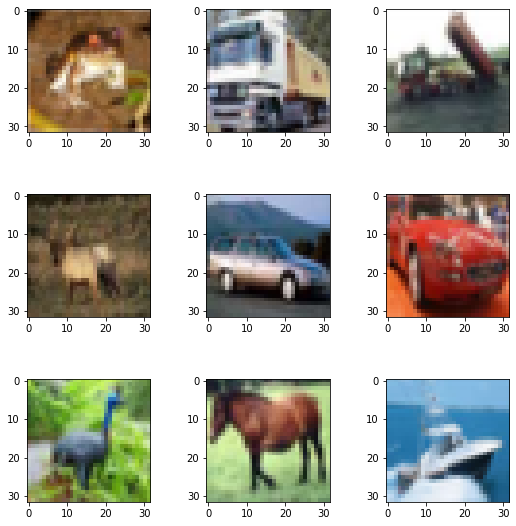

In [18]:
# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
# (trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
fig , ax = plt.subplots(3, 3)
# plot first few images
for i in range(9):
  # plot raw pixel data
  ax[i//3, i%3]. imshow (x_train[i])
# show the figure
fig.tight_layout()
fig.set_figheight(8)
fig.set_figwidth(8)
plt.show()

Model: "Dense_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_Layer_1 (Dense)       (None, 2048)              6293504   
                                                                 
 Dense_Layer_2 (Dense)       (None, 1024)              2098176   
                                                                 
 Dense_Layer_3 (Dense)       (None, 512)               524800    
                                                                 
 Dense_Layer_4 (Dense)       (None, 128)               65664     
                                                                 
 Softmax_Output_Layer (Dense  (None, 10)               1290      
 )                                                               
                                                                 
Total params: 8,983,434
Trainable params: 8,983,434
Non-trainable params: 0
_____________________________________________

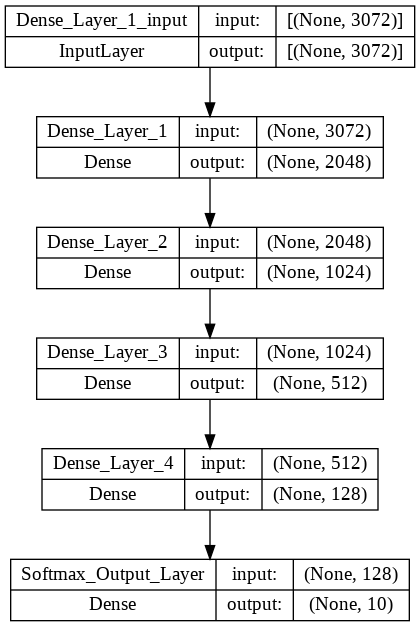

In [3]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

dense_model = Sequential(
    [
        Dense(2048, input_dim=32*32*3, activation='relu', name='Dense_Layer_1'),
        Dense(1024, activation='relu', name='Dense_Layer_2'),
        Dense(512, activation='relu', name='Dense_Layer_3'),
        Dense(128, activation='relu', name='Dense_Layer_4'),
        Dense(10, activation='softmax', name='Softmax_Output_Layer'),
    ],
    name='Dense_Model'
)


dense_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


dense_model.summary()
plot_model(dense_model, show_shapes=True)

In [4]:
with tf.device('/device:GPU:0'):
  dense_history = dense_model.fit(dense_train, trainY, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 5s 8ms/step - loss: 2.0343 - accuracy: 0.2549 - val_loss: 1.8709 - val_accuracy: 0.3275
Epoch 2/10
274/274 [==============================] - 2s 8ms/step - loss: 1.7589 - accuracy: 0.3616 - val_loss: 1.7097 - val_accuracy: 0.3854
Epoch 3/10
274/274 [==============================] - 2s 6ms/step - loss: 1.6674 - accuracy: 0.4023 - val_loss: 1.7009 - val_accuracy: 0.3878
Epoch 4/10
274/274 [==============================] - 2s 6ms/step - loss: 1.6091 - accuracy: 0.4235 - val_loss: 1.6153 - val_accuracy: 0.4222
Epoch 5/10
274/274 [==============================] - 2s 7ms/step - loss: 1.5534 - accuracy: 0.4434 - val_loss: 1.5622 - val_accuracy: 0.4403
Epoch 6/10
274/274 [==============================] - 2s 9ms/step - loss: 1.5128 - accuracy: 0.4580 - val_loss: 1.5374 - val_accuracy: 0.4515
Epoch 7/10
274/274 [==============================] - 3s 10ms/step - loss: 1.4703 - accuracy: 0.4721 - val_loss: 1.5351 - val_accuracy: 0.4487
Epoch

In [5]:
dense_test_accuracy = dense_model.evaluate(dense_test, testY)[1]
print("Test Accuracy",np.round((dense_test_accuracy)*100,2))

313/313 [==============================] - 1s 4ms/step - loss: 1.4630 - accuracy: 0.4798
Test Accuracy 47.98


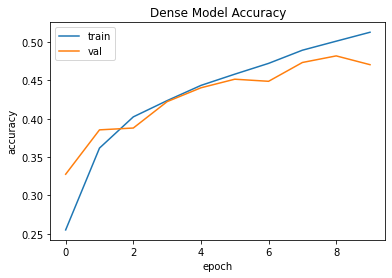

In [6]:
# Let's plot our results: Accuracy

plt.plot(dense_history.history['accuracy'])
plt.plot(dense_history.history['val_accuracy'])
plt.title('Dense Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

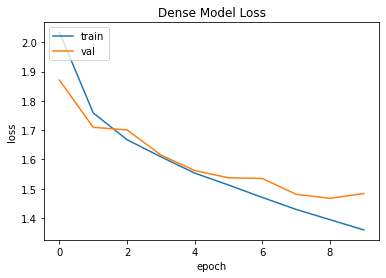

In [7]:
# Let's plot our results: Loss

plt.plot(dense_history.history['loss'])
plt.plot(dense_history.history['val_loss'])
plt.title('Dense Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

  <div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
      آشنایی با لایه کانولوشنی
      </font>
      <hr/>
      حال، مدلی Convolutional طراحی کرده و تصاویر CIFAR10 را روی آن آموزش می‌دهیم.
      </hr>
      
  </font>
  </div>


Model: "Convolutional_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv_Layer_1 (Conv2D)       (None, 30, 30, 32)        896       
                                                                 
 Max_Pool_1 (MaxPooling2D)   (None, 15, 15, 32)        0         
                                                                 
 Conv_Layer_2 (Conv2D)       (None, 13, 13, 64)        18496     
                                                                 
 Conv_Layer_3 (Conv2D)       (None, 11, 11, 128)       73856     
                                                                 
 Flatten (Flatten)           (None, 15488)             0         
                                                                 
 Dense_Flat_1 (Dense)        (None, 128)               1982592   
                                                                 
 Softmax_Output_Layer (Dense  (None, 10)       

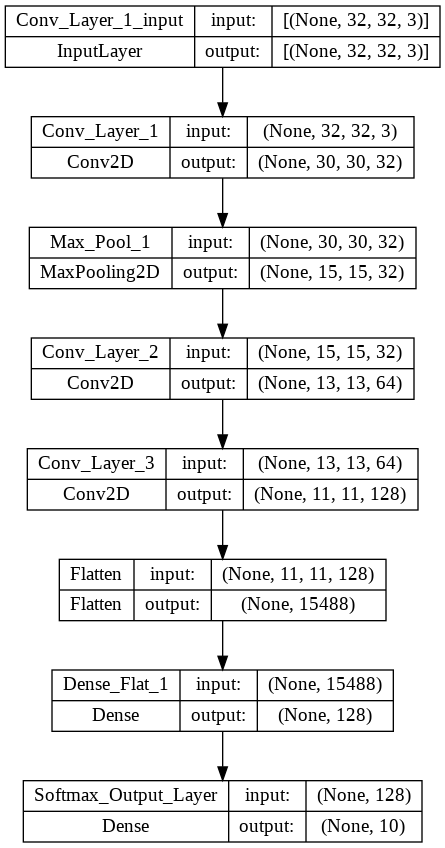

In [8]:
# CNN architecture
Convolutional_model = Sequential(
    [
        Conv2D(32, (3, 3), input_shape=(32, 32, 3),activation='relu', name='Conv_Layer_1'),
        MaxPool2D(pool_size=(2, 2), name='Max_Pool_1'),
        Conv2D(64, (3, 3),activation='relu', name='Conv_Layer_2'),
        Conv2D(128, (3, 3),activation='relu', name='Conv_Layer_3'),
        Flatten(name='Flatten'),
        Dense(128, activation='relu', name='Dense_Flat_1'),
        Dense(10, activation='softmax', name='Softmax_Output_Layer')
    ],
    name='Convolutional_Model'
)

Convolutional_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Convolutional_model.summary()
plot_model(Convolutional_model, show_shapes=True)

In [9]:
with tf.device('/device:GPU:0'):
  conv_history = Convolutional_model.fit(x_train, trainY, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 12s 13ms/step - loss: 1.5714 - accuracy: 0.4290 - val_loss: 1.3038 - val_accuracy: 0.5398
Epoch 2/10
274/274 [==============================] - 3s 11ms/step - loss: 1.1907 - accuracy: 0.5764 - val_loss: 1.2918 - val_accuracy: 0.5618
Epoch 3/10
274/274 [==============================] - 3s 10ms/step - loss: 1.0212 - accuracy: 0.6411 - val_loss: 1.0404 - val_accuracy: 0.6334
Epoch 4/10
274/274 [==============================] - 3s 11ms/step - loss: 0.8812 - accuracy: 0.6897 - val_loss: 0.9541 - val_accuracy: 0.6710
Epoch 5/10
274/274 [==============================] - 3s 11ms/step - loss: 0.7914 - accuracy: 0.7231 - val_loss: 0.9199 - val_accuracy: 0.6857
Epoch 6/10
274/274 [==============================] - 3s 10ms/step - loss: 0.6794 - accuracy: 0.7635 - val_loss: 0.8965 - val_accuracy: 0.6967
Epoch 7/10
274/274 [==============================] - 3s 13ms/step - loss: 0.5872 - accuracy: 0.7949 - val_loss: 0.9221 - val_accuracy: 0.699

In [10]:
conv_test_accuracy = Convolutional_model.evaluate(x_test, testY)[1]
print("Test Accuracy",np.round((conv_test_accuracy)*100,2))

313/313 [==============================] - 1s 4ms/step - loss: 1.1774 - accuracy: 0.6735
Test Accuracy 67.35


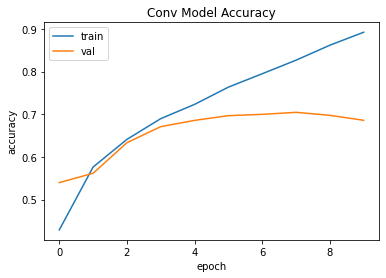

In [11]:
# Let's plot our results: Accuracy

plt.plot(conv_history.history['accuracy'])
plt.plot(conv_history.history['val_accuracy'])
plt.title('Conv Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

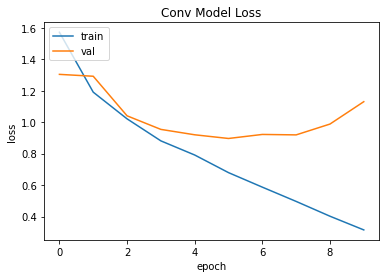

In [12]:
# Let's plot our results: Loss

plt.plot(conv_history.history['loss'])
plt.plot(conv_history.history['val_loss'])
plt.title('Conv Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

  <div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
      <hr/>
      نتایج دو مدل را با هم مقایسه می‌کنیم.
      <br>
      همانطور که مشخص است مدل Convolutional با وجود داشتن پارامترهای خیلی کمتر، با اختلاف زیادی بهتر عمل می‌کند.
      </hr>
      
  </font>
  </div>


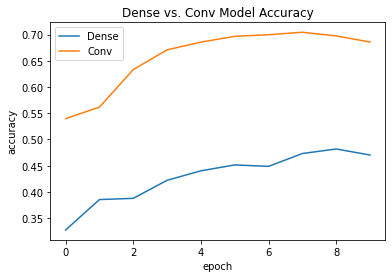

In [13]:
plt.plot(dense_history.history['val_accuracy'])
plt.plot(conv_history.history['val_accuracy'])
plt.title('Dense vs. Conv Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Dense', 'Conv'], loc='upper left')
plt.show()

  <div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
      <hr/>
      معماری مدل‌ها و Hyperparameter ها را به دلخواه تغییر دهید و نتایج مختلف را آزمایش کنید.
      <br>



می‌توانید سعی کنید با راهکارهایی که در فصل قبل آموختید، جلوی Overfit شدن مدل‌ها را گرفته و نتایج را دوباره مقایسه کنید.


  </font>
  </div>
